# Linear Regression with Python and sklearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import math
import numpy as np

# Enable inline plotting
%matplotlib inline

## Reading in Data

We'll read in a dataset containing some information about housing in Boston.

However, this time some of the Grad.Rate data is missing (NA).

In [17]:
df = pd.read_csv('College-MISSING.csv')
print(df.head())

                        College Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.R

Let's predict graduation rate (Grad.Rate) based on the other variables. So Grad.Rate will be our outcome (y) and the other variables will be our features (X). 

But first we will remove missing data.

# Removing Missing Data

We will remove any rows with missing (NA) data, in order to fit our linear regression model.

In [18]:
df_complete = df.dropna(axis=0, how='any')
print(df_complete.head())

                        College Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
2                Adrian College     Yes  1428    1097     336         22   
4     Alaska Pacific University     Yes   193     146      55         16   
5             Albertson College     Yes   587     479     158         38   
6       Albertus Magnus College     Yes   353     340     103         17   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
2         50         1036           99     11250        3750    400      1165   
4         44          249          869      7560        4120    800      1500   
5         62          678           41     13500        3335    500       675   
6         45          416          230     13290        5720    500      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.R

Then we will divide that into features (X) and outcomes (y), as before.

In [19]:
X = df_complete.drop(['College', 'Private', 'Grad.Rate'], axis=1)
print("Here are the features (X):")
print(X.head())

print("\n\nHere is the outcome variable (y):")
y = df_complete['Grad.Rate']
print(y)

Here are the features (X):
   Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
2  1428    1097     336         22         50         1036           99   
4   193     146      55         16         44          249          869   
5   587     479     158         38         62          678           41   
6   353     340     103         17         45          416          230   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
2     11250        3750    400      1165   53        66       12.9   
4      7560        4120    800      1500   76        72       11.9   
5     13500        3335    500       675   67        73        9.4   
6     13290        5720    500      1500   90        93       11.5   

   perc.alumni  Expend  
0           12    7041  
2           30    8735  
4            2   10922  
5

## Regression Models in sklearn

We will fit a regression model to predict Grad.Rate, just like in the previous lab.

We create an instance of the LinearRegression class in sklearn:

In [20]:
lm = linear_model.LinearRegression()

We then fit the model to the training data. 

In [21]:
lm.fit(X, y)

LinearRegression()

We can check the coefficients/parameters, and the intercept term. 

In [22]:
print(lm.coef_)
print(lm.intercept_)

[ 0.00108172 -0.00041358  0.00270295  0.08499565  0.12251812 -0.00068643
 -0.00150103  0.00110305  0.00217178 -0.00160813 -0.00172441  0.0732174
 -0.0975573   0.00542521  0.29218027 -0.0004737 ]
38.095345836140325


# Imputation

Then we want to get predictions on the full dataset, including the rows that had missing (NA) data, so that we can impute the missing values using our trained regression model. 

So we need to get the features (X) for the entire dataset, not just the complete cases.

In [23]:
X_all = df.drop(['College', 'Private', 'Grad.Rate'], axis=1)

preds = lm.predict(X_all)


Or we could get predictions for just the records where Grad.Rate was missing:

In [24]:
missing = df['Grad.Rate'].isnull()
preds_missing = lm.predict(X_all.loc[missing, :])
print(preds_missing)

[64.98936473 77.34827933 57.83035556 49.81144881 70.58416761 61.38581165
 49.1608638  47.81355672 46.32245599 51.22136455 54.42369036 87.43574105
 65.7785619  67.30902613 52.93951546 54.26627148 67.63399584 47.8824882
 53.38464218 63.60876679]


# Inserting the Predicted Values

For any Grad.Rate that was NA, we want to replace it with the predicted value. But for any Grad.Rate that was _not_ missing, we just want to use its original value, not the predicted value. 

The following code does that interleaving. 

In [25]:
df.loc[missing,'Grad.Rate']=preds_missing

'''
The following iterative code would give the same solution.
It loops over the full dataset,
and only imputes a predicted value for a record if it was originally missing.
But the above code is more concise and efficient.
'''

#for i in range(len(df)):
#    if math.isnan(df.loc[i, 'Grad.Rate']):
#        df.loc[i, 'Grad.Rate'] = preds[i]

print(df['Grad.Rate'])

0      60.000000
1      64.989365
2      54.000000
3      77.348279
4      15.000000
         ...    
772    40.000000
773    83.000000
774    63.608767
775    99.000000
776    99.000000
Name: Grad.Rate, Length: 777, dtype: float64


## Mean Imputation

Sometimes we might want a simpler imputation method. We could replace each NA value with the mean or median of the non-missing values.

Let's generate some toy data:

In [26]:
mydat = pd.DataFrame([1,2,np.nan,3,3.5,4], columns=["Sensor"])
print(mydat)

   Sensor
0     1.0
1     2.0
2     NaN
3     3.0
4     3.5
5     4.0


Here we replace the missing values with the mean value:

In [27]:
mean_reading = mydat['Sensor'].mean(skipna=True)
new_df = mydat['Sensor'].fillna(mean_reading)
print(new_df)

0    1.0
1    2.0
2    2.7
3    3.0
4    3.5
5    4.0
Name: Sensor, dtype: float64


If we were concerned about outliers, we could have used the median instead.

## Interpolation

In cases where it is appropriate (e.g. with some time-series data), we can have Pandas interpolate between data points to fill in the missing data. 

In [28]:
mydat.interpolate()

,Sensor
0,1.0
1,2.0
2,2.5
3,3.0
4,3.5
5,4.0


<AxesSubplot:>

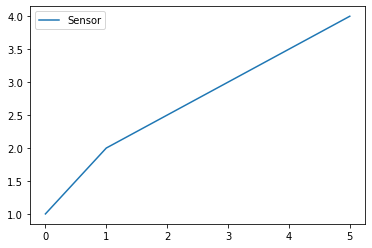

In [29]:
mydat.interpolate().plot()

# Lab Assignment

***
__Exercise 1__: Read in the College data we used last time (*College.csv*) that had no missing data. Compare our predictions of the missing values with the actual values. Create a scatter plot showing the original values (before deletion) compared with the predicted values from the imputation model.
***

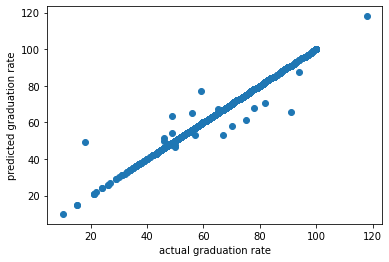

In [31]:
df_compare = pd.read_csv('College.csv')
original = df_compare['Grad.Rate']
preds = df['Grad.Rate']

plt.figure()
plt.scatter(original, preds)
plt.xlabel('actual graduation rate')
plt.ylabel('predicted graduation rate')
plt.show()

***
__Exercise 2__: You are provided with a copy of the mtcars dataset (*mtcars-MISSING.csv*) that has some missing horsepower (hp) values. Read the dataset into Python/Pandas, and follow the steps shown above to impute the missing values using linear regression.
***

In [4]:
df1 = pd.read_csv('mtcars-MISSING.csv')
print(df1.head())

               model   mpg  cyl   disp     hp  drat     wt   qsec  vs  am  \
0          Mazda RX4  21.0    6  160.0  110.0  3.90  2.620  16.46   0   1   
1      Mazda RX4 Wag  21.0    6  160.0    NaN  3.90  2.875  17.02   0   1   
2         Datsun 710  22.8    4  108.0   93.0  3.85  2.320  18.61   1   1   
3     Hornet 4 Drive  21.4    6  258.0  110.0  3.08  3.215  19.44   1   0   
4  Hornet Sportabout  18.7    8  360.0  175.0  3.15  3.440  17.02   0   0   

   gear  carb  
0     4     4  
1     4     4  
2     4     1  
3     3     1  
4     3     2  


In [6]:
df1_complete = df1.dropna(axis=0, how='any')
print(df1_complete.head())

               model   mpg  cyl   disp     hp  drat     wt   qsec  vs  am  \
0          Mazda RX4  21.0    6  160.0  110.0  3.90  2.620  16.46   0   1   
2         Datsun 710  22.8    4  108.0   93.0  3.85  2.320  18.61   1   1   
3     Hornet 4 Drive  21.4    6  258.0  110.0  3.08  3.215  19.44   1   0   
4  Hornet Sportabout  18.7    8  360.0  175.0  3.15  3.440  17.02   0   0   
5            Valiant  18.1    6  225.0  105.0  2.76  3.460  20.22   1   0   

   gear  carb  
0     4     4  
2     4     1  
3     3     1  
4     3     2  
5     3     1  


In [9]:
X1 = df1_complete.drop(['hp', 'model'], axis=1)
print("Here are the features (X):")
print(X1.head())

print("\n\nHere is the outcome variable (y):")
y1 = df1_complete['hp']
print(y1)

Here are the features (X):
    mpg  cyl   disp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  3.90  2.620  16.46   0   1     4     4
2  22.8    4  108.0  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  3.15  3.440  17.02   0   0     3     2
5  18.1    6  225.0  2.76  3.460  20.22   1   0     3     1


Here is the outcome variable (y):
0     110.0
2      93.0
3     110.0
4     175.0
5     105.0
6     245.0
7      62.0
8      95.0
9     123.0
10    123.0
12    180.0
14    205.0
15    215.0
16    230.0
17     66.0
18     52.0
19     65.0
20     97.0
21    150.0
22    150.0
23    245.0
25     66.0
26     91.0
27    113.0
28    264.0
29    175.0
30    335.0
Name: hp, dtype: float64


In [11]:
lm1 = linear_model.LinearRegression()
lm1.fit(X1, y1)
print(lm1.coef_)
print(lm1.intercept_)

[ -1.599297     2.7927305    0.58885923  -5.62093332 -41.42900507
   0.54166453  21.21561372   7.55062784   5.09214275  23.31394143]
71.44884224504646


In [13]:
X1_all = df1.drop(['model','hp'], axis=1)
missing = df1['hp'].isnull()
preds_missing = lm1.predict(X1_all.loc[missing, :])
print(preds_missing)

[138.20152991 138.74048969 152.99905627 193.16056692  87.20976056]


In [15]:
df1.loc[missing,'hp']=preds_missing
print(df1['hp'])

0     110.000000
1     138.201530
2      93.000000
3     110.000000
4     175.000000
5     105.000000
6     245.000000
7      62.000000
8      95.000000
9     123.000000
10    123.000000
11    138.740490
12    180.000000
13    152.999056
14    205.000000
15    215.000000
16    230.000000
17     66.000000
18     52.000000
19     65.000000
20     97.000000
21    150.000000
22    150.000000
23    245.000000
24    193.160567
25     66.000000
26     91.000000
27    113.000000
28    264.000000
29    175.000000
30    335.000000
31     87.209761
Name: hp, dtype: float64
